In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import sklearn
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
# Generate random data for demonstration
TRUE_SLOPE = 2
TRUE_INTERCEPT = 1
RAND_SCALE = 0.1
RAND_SEED = 0
np.random.seed(RAND_SEED)
X = np.random.rand(100, 1)  # Feature (input)
#sort so graphs come out better
y = TRUE_SLOPE * X + TRUE_INTERCEPT + RAND_SCALE * np.random.randn(100, 1)  # Target variable (output) with some noise


In [ ]:
# Split the data into training (80%) and testing (20%) sets
test_start_index = int(0.8 * len(X)) #from 80% index to 100% index (20% total) for testing
X_train = X[:test_start_index]
X_test = X[test_start_index:]
y_train = y[:test_start_index]
y_test = y[test_start_index:]

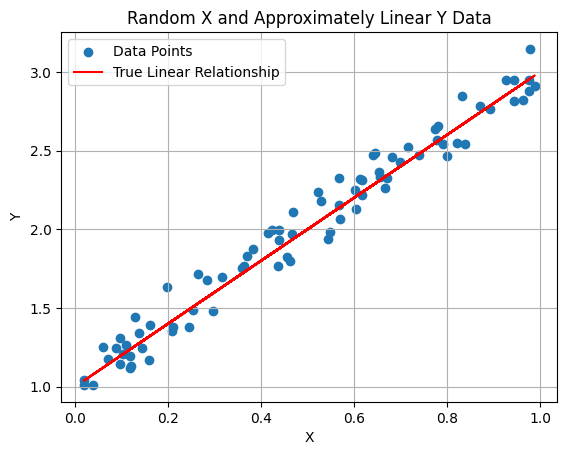

In [ ]:
# Plot the data points
plt.scatter(X_train, y_train, label='Data Points')

# Plot the true linear relationship without noise
true_y = TRUE_SLOPE * X_train + TRUE_INTERCEPT
plt.plot(X_train, true_y, color='red',
         #linewidth=1,
         label='True Linear Relationship')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Random X and Approximately Linear Y Data')
plt.grid(True)
plt.show()

In [ ]:
# Define the learning rate and the number of epochs
# Experiment with making the learning rate larger and smaller to see how it affects your results.
# What do you expect to happen with a learning rate that is too hight?
# What do you expect to happen with a learning rate that is too low?
LEARNING_RATE = 0.01
EPOCHS = 10000000
EARLY_STOP = True
COST_THRESHOLD = 1e-5


# Initialize the coefficients (weights) with zeros
w = 0.0  # w (slope)
b = 0.0  # b (intercept)

# Initialize with a large value
prev_cost = float('inf')

# Lists to store cost values for plotting
cost_history = []

# Start measuring training time
start_time = time.time()

# Perform gradient descent to find the optimal coefficients
m = len(X_train)
for epoch in range(EPOCHS):
    w_gradient = 0.0  # Initialize dJ/dw for this epoch
    b_gradient = 0.0  # Initialize dJ/db for this epoch
    cost = 0.0        # Initialize cost for this epoch
    # this for loop computes my gradients, dJ/dw and dJ/db
    for i in range(m):
        xi = X_train[i]
        yi = y_train[i]
        error_i = w * xi + b - yi
        # Compute the cost for this data point
        cost = cost + error_i ** 2
        # Compute gradients for w & b at this point for this epoch
        w_gradient += xi * error_i # dJ/dw
        b_gradient += error_i # dJ/db
    # Update w & b for next epoch
    w = w - LEARNING_RATE * w_gradient / m
    b -= LEARNING_RATE * b_gradient / m
    # Append the cost to the history
    cost_history.append(cost / (2 * m))

    # Check for early stopping based on cost improvement
    if prev_cost - cost < COST_THRESHOLD and EARLY_STOP:
        EPOCHS = epoch
        break
    prev_cost = cost

# Stop measuring training time
end_time = time.time()
training_time = end_time - start_time



In [ ]:
# Make predictions using the trained model
y_test = w * X_test + b

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, w * X_test + b)

 #Calculate R-squared (R2) score
r2 = r2_score(y_test, w * X_test + b)
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.0
R-squared (R2) Score: 1.0


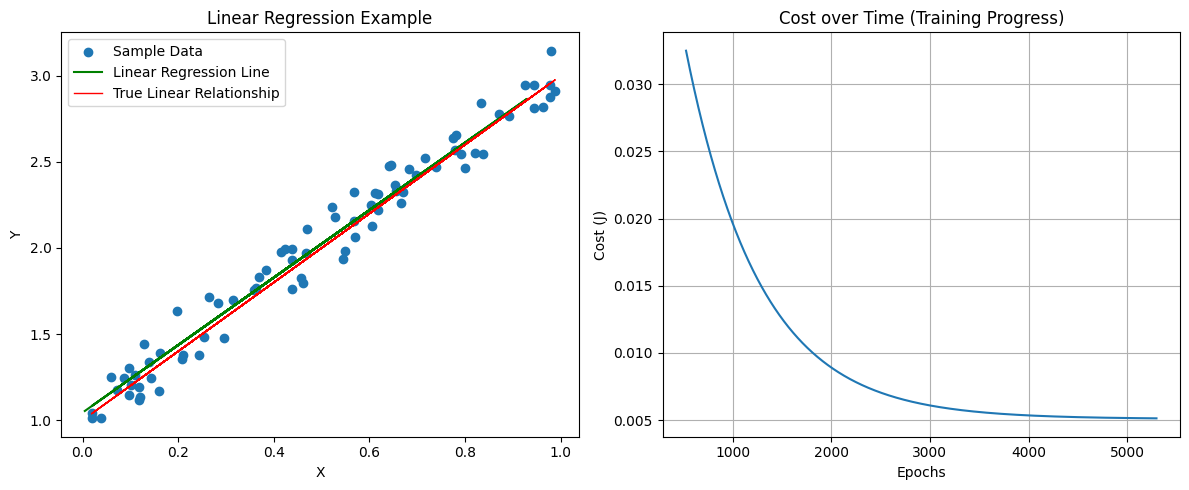

True Slope (m): 2          Model Slope (w): [1.960285]
True Intercept (b): 1      Model Intercept (b): [1.04434369]
Training Time: 3.09 seconds


In [ ]:
# Plot the original data and the linear regression line
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label='Sample Data')
plt.plot(X_test, y_test, color='green', label='Linear Regression Line')
plt.plot(X_train, true_y, color='red', linewidth=1, label='True Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression Example')

# Plot the cost over time (EPOCHS)
plt.subplot(1, 2, 2)
#plt.plot(range(EPOCHS), cost_history[:EPOCHS])
plt.plot(range(int(EPOCHS*0.1), len(cost_history)), cost_history[int(EPOCHS*0.1):])
plt.xlabel('Epochs')
plt.ylabel('Cost (J)')
plt.title('Cost over Time (Training Progress)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the learned coefficients (weights)
print("True Slope (m):", TRUE_SLOPE, "         Model Slope (w):", w)
print("True Intercept (b):", TRUE_INTERCEPT, "     Model Intercept (b):", b)
print(f"Training Time: {training_time:.2f} seconds")
